In [24]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Loading the data
file_path = file_path = 'C:/Users/gaurav/Downloads/Documents/Machine Learning-Project/Data.xlsx'
data = pd.read_excel(file_path)

In [28]:
# Display the first few rows of the data
print("Data Preview:")
print(data.head())

Data Preview:
            Date-Time  Agitation     Batch ID    Operation    Phase  \
0 2024-04-27 03:00:00        100  Batch R1-07  Operation 2  Phase 3   
1 2024-04-27 04:00:00        100  Batch R1-07  Operation 2  Phase 3   
2 2024-04-27 05:00:00        100  Batch R1-07  Operation 2  Phase 4   
3 2024-04-27 06:00:00        100  Batch R1-07  Operation 2  Phase 5   
4 2024-04-27 07:00:00        100  Batch R1-07  Operation 2  Phase 5   

     Product  Reactor Temperature  Solution Concentration  Volume  
0  Product 2                40.64                 19.3152  2615.2  
1  Product 2                39.20                 21.1890  3074.4  
2  Product 2                36.44                 20.7900  2786.0  
3  Product 2                19.82                 21.3150  2965.2  
4  Product 2                20.10                 20.6430  2976.4  


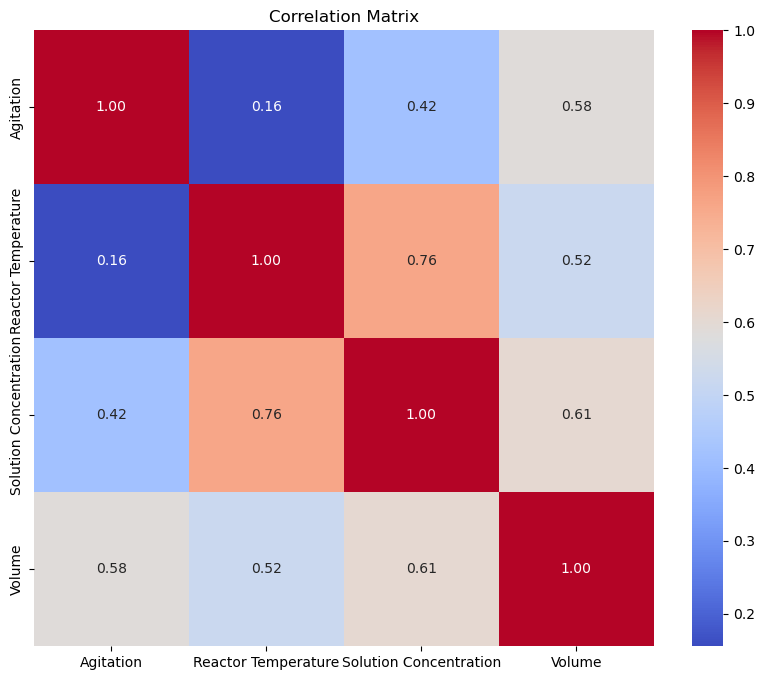

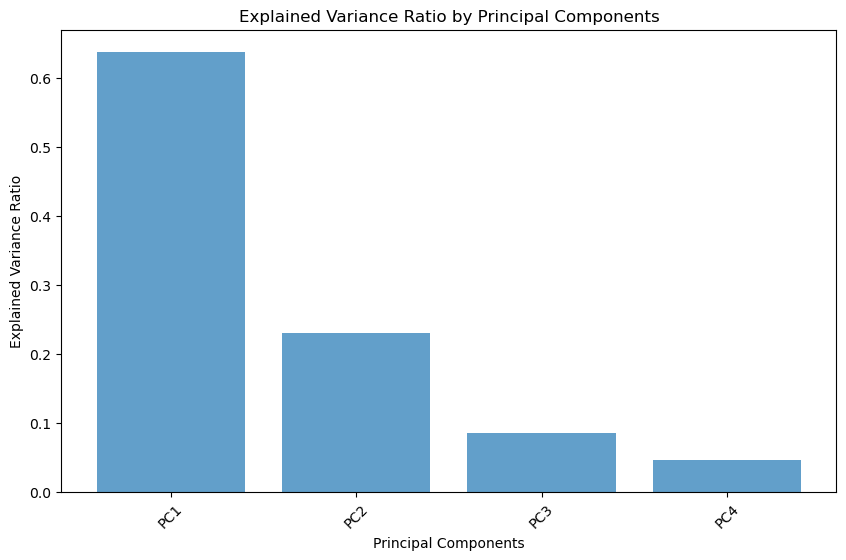

First two principal components saved to: C:/Users/gaurav/Downloads/Documents/Machine Learning-Project/First_Two_Principal_Components.xlsx


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric columns for PCA
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the numeric data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_data)

# Calculate and visualize the correlation matrix
correlation_matrix = np.corrcoef(standardized_data.T)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    xticklabels=numeric_data.columns,
    yticklabels=numeric_data.columns
)
plt.title("Correlation Matrix")
plt.show()

# Perform PCA and fit the data
pca = PCA()
pca_components = pca.fit_transform(standardized_data)

# Visualize the explained variance ratio for all components
plt.figure(figsize=(10, 6))
plt.bar(
    x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    height=pca.explained_variance_ratio_,
    alpha=0.7
)
plt.title("Explained Variance Ratio by Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.xticks(rotation=45)
plt.show()

# Retain only the first two principal components
pca_two_components = pca_components[:, :2]

# Create a DataFrame with the first two principal components
pca_df = pd.DataFrame(
    data=pca_two_components,
    columns=['PC1', 'PC2']
)

# Save the PCA results
output_path = 'C:/Users/gaurav/Downloads/Documents/Machine Learning-Project/First_Two_Principal_Components.xlsx'
pca_df.to_excel(output_path, index=False)

print(f"First two principal components saved to: {output_path}")


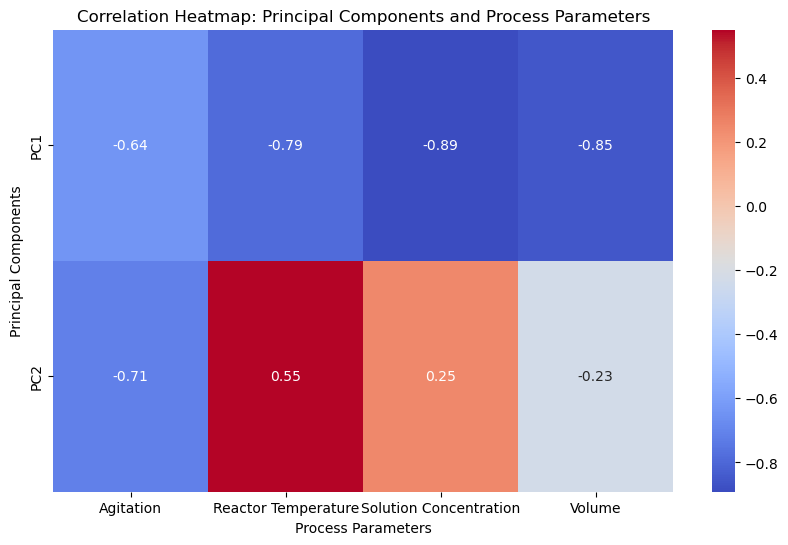

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the numeric data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA()
pca_components = pca.fit_transform(standardized_data)

# Create a DataFrame for the first two principal components
pca_df = pd.DataFrame(
    data=pca_components[:, :2],  # Select only the first two components
    columns=['PC1', 'PC2']
)

# Combine the principal components with the standardized numeric data
combined_data = pd.concat([pca_df, pd.DataFrame(standardized_data, columns=numeric_data.columns)], axis=1)

# Calculate the correlation matrix between the first two principal components and the original features
correlation_matrix_pca = combined_data.corr().loc[['PC1', 'PC2'], numeric_data.columns]

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix_pca,
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)
plt.title("Correlation Heatmap: Principal Components and Process Parameters")
plt.xlabel("Process Parameters")
plt.ylabel("Principal Components")
plt.show()


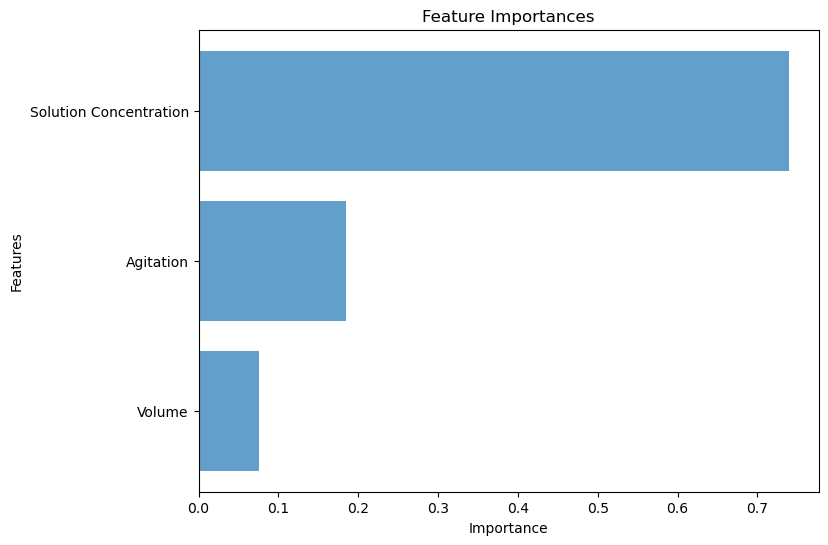

Cross-Validation R^2 Scores: [0.88067097 0.86701835 0.87010353 0.86750301 0.88003276]
Mean Cross-Validation R^2 Score: 0.8730657246468994
Cross-Validation R^2 Scores (Reduced Features): [0.77652764 0.70349399 0.70161454 0.71221277 0.7670404 ]
Mean Cross-Validation R^2 Score (Reduced Features): 0.7321778684156397


In [22]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Define features and target
X = numeric_data.drop(columns=['Reactor Temperature'])  # Exclude the target variable
y = numeric_data['Reactor Temperature']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Calculate feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], alpha=0.7)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

# Display cross-validation results
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean Cross-Validation R^2 Score:", cv_scores.mean())

# Remove the weak feature and re-validate
X_reduced = numeric_data[['Solution Concentration', 'Volume']]  # Retain only strong features
X_reduced_scaled = scaler.fit_transform(X_reduced)

# Cross-validation with reduced features
cv_scores_reduced = cross_val_score(model, X_reduced_scaled, y, cv=5, scoring='r2')

# Display cross-validation results for reduced features
print("Cross-Validation R^2 Scores (Reduced Features):", cv_scores_reduced)
print("Mean Cross-Validation R^2 Score (Reduced Features):", cv_scores_reduced.mean())

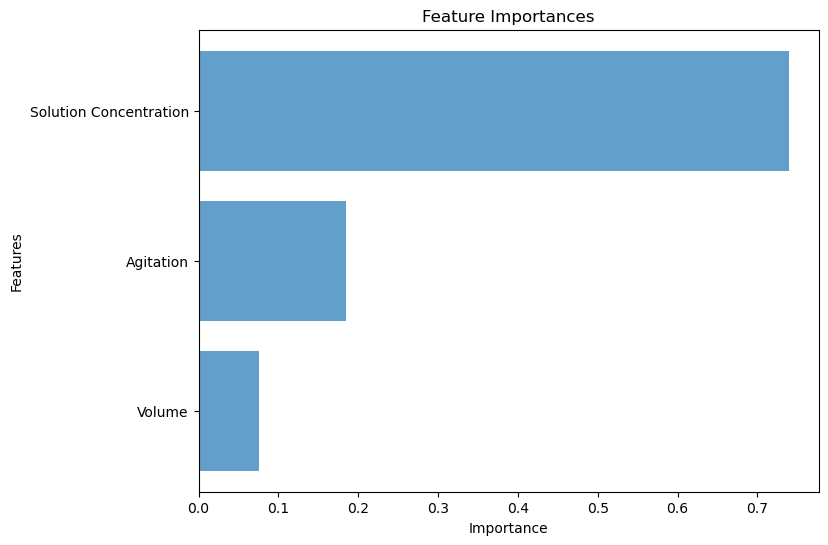

Cross-Validation R^2 Scores (All Features): [0.88067097 0.86701835 0.87010353 0.86750301 0.88003276]
Mean Cross-Validation R^2 Score (All Features): 0.8730657246468994
Cross-Validation R^2 Scores (Reduced Features: Solution Concentration and Agitation): [0.86983279 0.85062292 0.85912749 0.88479402 0.88245468]
Mean Cross-Validation R^2 Score (Reduced Features): 0.8693663773131559


In [32]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Define features and target
X = numeric_data.drop(columns=['Reactor Temperature'])  # Exclude the target variable
y = numeric_data['Reactor Temperature']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Calculate feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], alpha=0.7)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

# Perform cross-validation for all features
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

# Display cross-validation results for all features
print("Cross-Validation R^2 Scores (All Features):", cv_scores)
print("Mean Cross-Validation R^2 Score (All Features):", cv_scores.mean())

# Reduced features: Solution Concentration and Agitation
X_reduced = numeric_data[['Solution Concentration', 'Agitation']]
X_reduced_scaled = scaler.fit_transform(X_reduced)

# Perform cross-validation with reduced features
cv_scores_reduced = cross_val_score(model, X_reduced_scaled, y, cv=5, scoring='r2')

# Display cross-validation results for reduced features
print("Cross-Validation R^2 Scores (Reduced Features: Solution Concentration and Agitation):", cv_scores_reduced)
print("Mean Cross-Validation R^2 Score (Reduced Features):", cv_scores_reduced.mean())
